In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import requests
import orjson 
import pandas as pd 
import polars as pl
from time import sleep

# x = requests.get('https://api.opendota.com/api/publicMatches', params={'less_than_match_id':7075980402})

In [3]:
# from tqdm import tqdm

# df = pl.read_parquet('../DATA/tmp_03.20.2023.10.08.35.parquet').to_pandas()
# SET = set()
# for idx, row in tqdm(df.iterrows()):
#     SET.update(row['winner_team'])
    
# TRANSFORM = {hero_id : idx + 1 for idx, hero_id in enumerate(list(SET))}
# TRANSFORM

In [20]:
df = pl.read_parquet('DATA/tmp_01.09.2025.15.23.46.parquet')  # tmp_03.11.2023.03.58.04.parquet
df = df.to_pandas()
df['avg_rank_tier'] = df['avg_rank_tier'].apply(lambda x: min(5, x // 10 - 1))
df = pl.from_pandas(df).with_columns(
    pl.when("radiant_win").then("radiant_team").otherwise("dire_team").alias("winner_team"),
    pl.when("radiant_win").then("dire_team").otherwise("radiant_team").alias("loser_team")
).drop(['dire_team', 'radiant_team', 'radiant_win'])
DICTS = df.to_dicts()

In [21]:
df  #  (2433383, 11)

match_id,match_seq_num,duration,start_time,game_mode,avg_rank_tier,winner_team,loser_team
i64,i64,i64,i64,i64,i64,list[i64],list[i64]
8121174818,6828143444,2493,1736436226,22,5,"[41, 25, … 2]","[138, 96, … 84]"
8121174816,6828139657,2195,1736436226,22,5,"[84, 54, … 29]","[8, 36, … 96]"
8121174713,6828125565,1496,1736436226,22,1,"[49, 31, … 4]","[46, 16, … 5]"
8121174711,6828125144,1656,1736436226,4,1,"[136, 86, … 68]","[82, 44, … 123]"
8121174901,6828124639,1586,1736436226,22,3,"[62, 96, … 54]","[67, 99, … 119]"
…,…,…,…,…,…,…,…
8165073615,6863453759,1305,1739027192,22,3,"[74, 8, … 3]","[35, 69, … 73]"
8165073801,6863451148,1205,1739027198,22,5,"[138, 44, … 62]","[70, 85, … 17]"
8165074101,6863455030,1325,1739027207,22,4,"[8, 88, … 112]","[4, 2, … 20]"


In [22]:
df['game_mode'].value_counts()

game_mode,count
i64,u32
1,18
2,5231
4,63035
22,2516163
16,40
5,1
3,26735


In [23]:
TEST_DICTS = DICTS[-len(DICTS) // 10:]
TRAIN_DICTS = DICTS[:-len(DICTS) // 10]
len(TRAIN_DICTS), len(TEST_DICTS)

(2350100, 261123)

In [24]:
from picker.model.dataset import TeamDataset

In [25]:
# from tqdm import tqdm

# df = pl.read_parquet('../DATA/tmp_03.20.2023.10.08.35.parquet').to_pandas()
# SET = set()
# for idx, row in tqdm(df.iterrows()):
#     SET.update(row['winner_team'])
    
# TRANSFORM = {hero_id : idx + 1 for idx, hero_id in enumerate(list(SET))}
# TRANSFORM

In [26]:
train_data = TeamDataset('', dicts_override=TRAIN_DICTS, p=0.2)
test_data1 = TeamDataset('', dicts_override=TEST_DICTS, p=0.0)
test_data2 = TeamDataset('', dicts_override=TEST_DICTS, p=0.2)

In [27]:
from picker.model.training_model import run_training
from picker.model.transformer import TransformerModel
from picker.model.constants import HERO_TRANSFORM

In [28]:
# embedding_dict = {'team': [len(HERO_TRANSFORM) + 1, 15], 'enemy': [len(HERO_TRANSFORM) + 1, 32]} 
embedding_dict = {'team': [len(HERO_TRANSFORM) + 1, 32 - 3 - 1], 'rank': [6, 3]} 
model = TransformerModel(embedding_dict=embedding_dict, num_heads=8, num_layers=6,)

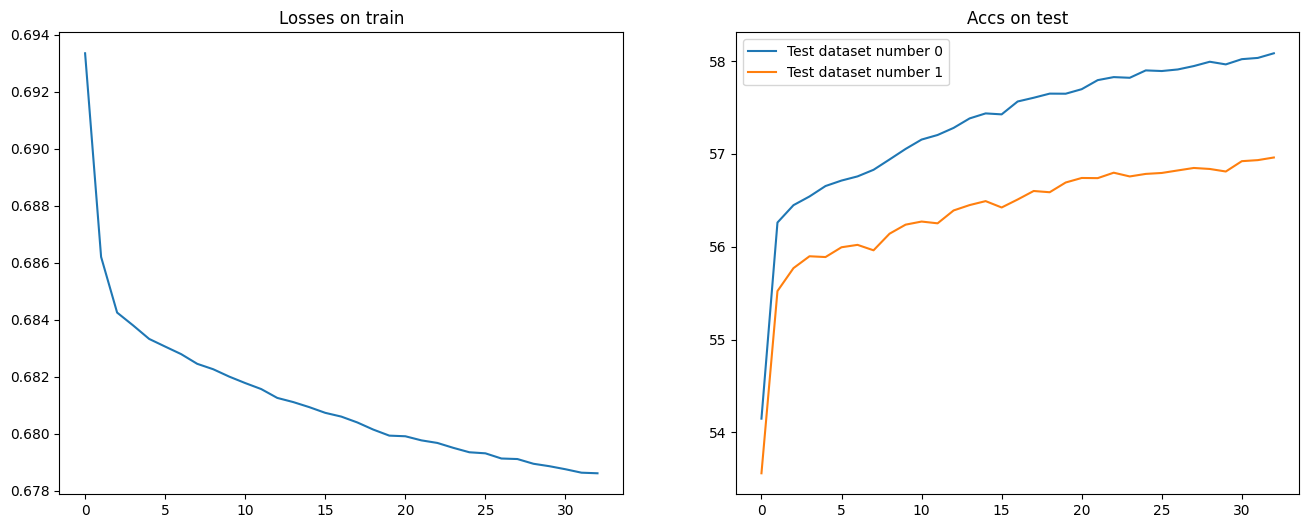

Train...:   2%|█▌                                                                                                | 9/574 [00:02<02:51,  3.29it/s]


KeyboardInterrupt: 

In [30]:
from torch.nn import BCELoss, CrossEntropyLoss
import torch

run_training(model=model, name='trans-32-0.2-v2', train_data=train_data, test_datas=[test_data1, test_data2],
             optimizer=torch.optim.Adam(model.parameters(), lr=3e-4),
             criterion=CrossEntropyLoss(),
             epochs=100, batch_size=1024 * 8, device='cuda')

In [31]:
torch.save(model.state_dict(), f"zhopa.pth")

In [15]:
%debug

> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/torch/_utils.py(543)reraise()
    541             # instantiate since we don't know how to
    542             raise RuntimeError(msg) from None
--> 543         raise exception
    544 
    545 



ipdb>  u


> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py(1359)_process_data()
   1357         self._try_put_index()
   1358         if isinstance(data, ExceptionWrapper):
-> 1359             data.reraise()
   1360         return data
   1361 



ipdb>  u


> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py(1333)_next_data()
   1331             else:
   1332                 del self._task_info[idx]
-> 1333                 return self._process_data(data)
   1334 
   1335     def _try_put_index(self):



ipdb>  u


> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py(628)__next__()
    626                 # TODO(https://github.com/pytorch/pytorch/issues/76750)
    627                 self._reset()  # type: ignore[call-arg]
--> 628             data = self._next_data()
    629             self._num_yielded += 1
    630             if self._dataset_kind == _DatasetKind.Iterable and \



ipdb>  u


> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/tqdm/std.py(1195)__iter__()
   1193 
   1194         try:
-> 1195             for obj in iterable:
   1196                 yield obj
   1197                 # Update and possibly print the progressbar.



ipdb>  u


> /mnt/d/Git_shit_2/shad_courses/picker/picker/model/training_model.py(14)train()
     12     optimizer.zero_grad()
     13 
---> 14     for idx, (X, y) in enumerate(tqdm(train_dl, total=len(train_dl), desc="Train...")):
     15         if isinstance(X, torch.Tensor):
     16             X = X.to(device)



ipdb>  u


> /mnt/d/Git_shit_2/shad_courses/picker/picker/model/training_model.py(100)run_training()
     98 
     99     for epoch in range(epochs):
--> 100         loss_log = train(
    101             model=model,
    102             train_dl=train_dl,



ipdb>  u


> /tmp/ipykernel_56155/687358011.py(4)<module>()
      2 import torch
      3 
----> 4 run_training(model=model, name='trans-32-0.2-v2', train_data=train_data, test_datas=[test_data1, test_data2],
      5              optimizer=torch.optim.Adam(model.parameters(), lr=3e-4),
      6              criterion=CrossEntropyLoss(),



ipdb>  d


> /mnt/d/Git_shit_2/shad_courses/picker/picker/model/training_model.py(100)run_training()
     98 
     99     for epoch in range(epochs):
--> 100         loss_log = train(
    101             model=model,
    102             train_dl=train_dl,



ipdb>  d


> /mnt/d/Git_shit_2/shad_courses/picker/picker/model/training_model.py(14)train()
     12     optimizer.zero_grad()
     13 
---> 14     for idx, (X, y) in enumerate(tqdm(train_dl, total=len(train_dl), desc="Train...")):
     15         if isinstance(X, torch.Tensor):
     16             X = X.to(device)



ipdb>  d


> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/tqdm/std.py(1195)__iter__()
   1193 
   1194         try:
-> 1195             for obj in iterable:
   1196                 yield obj
   1197                 # Update and possibly print the progressbar.



ipdb>  d


> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py(628)__next__()
    626                 # TODO(https://github.com/pytorch/pytorch/issues/76750)
    627                 self._reset()  # type: ignore[call-arg]
--> 628             data = self._next_data()
    629             self._num_yielded += 1
    630             if self._dataset_kind == _DatasetKind.Iterable and \



ipdb>  d


> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py(1333)_next_data()
   1331             else:
   1332                 del self._task_info[idx]
-> 1333                 return self._process_data(data)
   1334 
   1335     def _try_put_index(self):



ipdb>  d


> /home/qc7/.cache/pypoetry/virtualenvs/picker-aqmUO_25-py3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py(1359)_process_data()
   1357         self._try_put_index()
   1358         if isinstance(data, ExceptionWrapper):
-> 1359             data.reraise()
   1360         return data
   1361 



ipdb>  exit


In [32]:
import torch 
from picker.model.transformer import TransformerModel
from picker.model.constants import HERO_TRANSFORM

embedding_dict = {'team': [len(HERO_TRANSFORM) + 1, 32 - 3 - 1], 'rank': [6, 3]} 
model = TransformerModel(embedding_dict=embedding_dict, num_heads=8, num_layers=6,)
model.load_state_dict(torch.load('zhopa.pth'))

model.to('cpu')
model.eval()
pass

In [33]:
# script = torch.jit.script(model)
torch.save(model, 'zhopa.raw_model') 

In [34]:
%%time

for HERO in HERO_TRANSFORM.values():
    print(
        torch.softmax(model(
        (torch.as_tensor([[0, 0, 0, 0, HERO] + [0, 0, 0, 0, 0]]),
         torch.as_tensor(5))  # ancient + rapier + immortal rank
    ), dim=-1), '\n',
        torch.softmax(model(
        (torch.as_tensor([[HERO, 0, 0, 0, 0] + [0, 0, 0, 0, 0]]),
         torch.as_tensor(5))  # ancient + rapier + immortal rank
    ), dim=-1), '\n',
        torch.softmax(model(
        (torch.as_tensor([[0, 0, 0, 0, 0] + [HERO, 0, 0, 0, 0]]),
         torch.as_tensor(5))  # ancient + rapier + immortal rank
    ), dim=-1),
    )
    print('-' * 60)

tensor([[0.5012, 0.4988]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5012, 0.4988]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5012, 0.4988]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5294, 0.4706]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5294, 0.4706]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4673, 0.5327]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5072, 0.4928]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5072, 0.4928]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4926, 0.5074]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4799, 0.5201]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4799, 0.5201]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5170, 0.4830]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4476, 0.5524]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4476, 0.5524

tensor([[0.5011, 0.4989]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5011, 0.4989]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5015, 0.4985]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5148, 0.4852]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5148, 0.4852]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4902, 0.5098]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4968, 0.5032]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4968, 0.5032]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5176, 0.4824]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5412, 0.4588]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5412, 0.4588]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4636, 0.5364]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5042, 0.4958]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5042, 0.4958

tensor([[0.5261, 0.4739]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5261, 0.4739]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4767, 0.5233]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4673, 0.5327]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4673, 0.5327]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5338, 0.4662]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4906, 0.5094]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4906, 0.5094]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5153, 0.4847]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4326, 0.5674]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4326, 0.5674]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5734, 0.4266]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4774, 0.5226]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4774, 0.5226

tensor([[0.5048, 0.4952]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5048, 0.4952]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5007, 0.4993]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4828, 0.5172]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4828, 0.5172]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5183, 0.4817]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5081, 0.4919]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5081, 0.4919]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4977, 0.5023]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4681, 0.5319]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4681, 0.5319]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5322, 0.4678]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5110, 0.4890]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5110, 0.4890

In [36]:
len(HERO_TRANSFORM)

127

In [ ]:
%debug

> /home/yarik/shad/picker/picker/model/training_model.py(57)plot_stuff()
     55     if len(accs):
     56         for idx in range(accs_np.shape[1]):
---> 57             ax2.plot(accs[:, idx], label = f'Test dataset number {idx}')
     58 
     59     ax2.set_title("Accs on test")

ipdb> idx
0
ipdb> accs[:, idx]
*** TypeError: list indices must be integers or slices, not tuple


In [32]:
import torch
A = torch.cat((torch.ones(512, 5, 1), torch.zeros(512, 5, 1)), dim=-2)

In [35]:
torch.cat((torch.rand(512, 10, 63), A), dim=-1).shape

torch.Size([512, 10, 64])

In [60]:
emb = torch.cat(embs).reshape(1, 10, -1)
res = model(emb, None)

In [61]:
res

tensor([[0.4648]], grad_fn=<AddmmBackward0>)

In [56]:
a = torch.rand(1, 10, 64)
b = torch.rand(1, 1, 64)

In [57]:
torch.cat((a, b), dim=1)

tensor([[[0.0823, 0.2277, 0.4079, 0.9386, 0.0742, 0.7202, 0.3607, 0.9005,
          0.1608, 0.2063, 0.7980, 0.9442, 0.0333, 0.5649, 0.2936, 0.4545,
          0.4625, 0.3905, 0.5795, 0.6908, 0.0839, 0.7522, 0.9392, 0.1067,
          0.3177, 0.5344, 0.1385, 0.7366, 0.2210, 0.7947, 0.2109, 0.0716,
          0.8087, 0.5818, 0.2675, 0.9628, 0.7965, 0.6796, 0.1220, 0.6453,
          0.2468, 0.2309, 0.3061, 0.2880, 0.1987, 0.7911, 0.5555, 0.4565,
          0.8999, 0.4815, 0.6246, 0.6285, 0.7902, 0.0816, 0.5806, 0.1977,
          0.6592, 0.5274, 0.3737, 0.8188, 0.5043, 0.8749, 0.7966, 0.2408],
         [0.9915, 0.3214, 0.3582, 0.4512, 0.1294, 0.6715, 0.8483, 0.3055,
          0.6333, 0.0336, 0.1905, 0.7927, 0.0481, 0.4222, 0.6530, 0.4618,
          0.4607, 0.9218, 0.1592, 0.9127, 0.1080, 0.6349, 0.9745, 0.8846,
          0.1505, 0.5538, 0.9617, 0.9514, 0.5724, 0.8122, 0.7971, 0.8665,
          0.4984, 0.1422, 0.6348, 0.0502, 0.9907, 0.4200, 0.7669, 0.3436,
          0.3604, 0.8022, 0.5990, 0.7